# Ahmed Mamdouh Khaled 

# Import Libraries

Matplotlib is primarily used for basic chart plotting, while Seaborn offers many default themes and a wide variety of schemes for statistical visualization.It is built on the roof of Matplotlib and is considered as a superset of the Matplotlib library.

In [33]:
import pandas as pd # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np  # type: ignore
from sklearn.preprocessing import LabelEncoder  # type: ignore
import panel as pn  # type: ignore
pn.extension('tabulator') # that is for creating interactive tables
import hvplot.pandas # that is for creating interactive dataframes  # type: ignore
import plotly.express as px  # type: ignore
import plotly.graph_objects as go  # type: ignore
import warnings


# Reading data_set

In [34]:
df = pd.read_csv("UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# Data set Information

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [36]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

# Data Exploration

In [37]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


# Removing Duplicates

In [38]:
df = df.drop_duplicates()
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


# Checking For Nulls

In [39]:
df[df.columns[df.isnull().sum()>0]].isnull().sum()

END_DATE      1
CATEGORY      1
START         1
STOP          1
PURPOSE     503
dtype: int64

# FillNa in numeric columns


The inplace=True parameter in pandas methods specifies whether the operation should modify the DataFrame in place or return a new DataFrame with the changes applied.

In [40]:
df.drop(index=1155, inplace=True) # NULL


In [41]:
df['END_DATE'].unique

<bound method Series.unique of 0         1/1/2016 21:17
1          1/2/2016 1:37
2         1/2/2016 20:38
3         1/5/2016 17:45
4         1/6/2016 15:49
              ...       
1150     12/31/2016 1:14
1151    12/31/2016 13:42
1152    12/31/2016 15:38
1153    12/31/2016 21:50
1154    12/31/2016 23:51
Name: END_DATE, Length: 1154, dtype: object>

In [42]:

# Assuming 'df' is your DataFrame
for x in df.index:
    if pd.isna(df.loc[x, 'END_DATE']):
        df.drop(x, inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)
for x in df.index:
    if pd.isna(df.loc[x, 'START_DATE']):
        df.drop(x, inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)



# FillNa in Object Columns 


In [43]:
import warnings

warnings.filterwarnings("ignore")
def fillna_object(columns):
    for column in columns :
        df[column].fillna(df[column].mode(),inplace = True)

Objects_Columns = ['STOP','MILES']
fillna_object(Objects_Columns)
df['PURPOSE'].fillna('Other',inplace = True)


In [44]:
df = df.sort_values(by='START_DATE', ascending=True)
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit
10,1/10/2016 15:08,1/10/2016 15:51,Business,New York,Queens,10.8,Meeting
11,1/10/2016 18:18,1/10/2016 18:53,Business,Elmhurst,New York,7.5,Meeting
12,1/10/2016 19:12,1/10/2016 19:32,Business,Midtown,East Harlem,6.2,Meeting
...,...,...,...,...,...,...,...
777,9/29/2016 16:13,9/29/2016 18:47,Business,Unknown Location,Islamabad,12.6,Other
778,9/30/2016 17:39,9/30/2016 20:20,Business,Islamabad,Islamabad,37.7,Other
779,9/30/2016 20:59,9/30/2016 22:34,Business,Islamabad,Unknown Location,16.7,Other
749,9/5/2016 10:25,9/5/2016 10:44,Business,Unknown Location,R?walpindi,17.2,Other


In [45]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit
10,1/10/2016 15:08,1/10/2016 15:51,Business,New York,Queens,10.8,Meeting
11,1/10/2016 18:18,1/10/2016 18:53,Business,Elmhurst,New York,7.5,Meeting
12,1/10/2016 19:12,1/10/2016 19:32,Business,Midtown,East Harlem,6.2,Meeting


In [46]:
df['START'].unique()
#'R?walpindi' 'Kar?chi'


array(['Fort Pierce', 'Jamaica', 'New York', 'Elmhurst', 'Midtown',
       'Cary', 'Flatiron District', 'Midtown East', 'East Harlem',
       'Hudson Square', 'Lower Manhattan', "Hell's Kitchen", 'Downtown',
       'Gulfton', 'Houston', 'Eagan Park', 'Morrisville', 'Durham',
       'Farmington Woods', 'Lake Wellingborough', 'Whitebridge',
       'Fayetteville Street', 'Raleigh', 'Hazelwood', 'Fairmont',
       'Meredith Townes', 'Apex', 'West Palm Beach', 'Islamabad',
       'Unknown Location', 'R?walpindi', 'Oakland', 'Emeryville',
       'Berkeley', 'Edgehill Farms', 'SOMISSPO', 'San Francisco',
       'West Berkeley', 'North Berkeley Hills', 'San Jose', 'Eagle Rock',
       'Savon Height', 'Parkway', 'Huntington Woods', 'Winston Salem',
       'Asheville', 'Topton', 'Hayesville', 'Bryson City', 'Almond',
       'Mebane', 'Lahore', 'Karachi', 'Tenderloin', 'Menlo Park',
       'Palo Alto', 'Central', 'College Avenue', 'South', 'Southside',
       'South Berkeley', 'Mountain View', 'E

In [47]:
df['START'] = df['START'].replace('R?walpindi', 'Rawalpindi')
df['START'] = df['START'].replace('Kar?chi','Karachi')



In [48]:
df['STOP'].unique()

array(['Fort Pierce', 'New York', 'Queens', 'East Harlem', 'Morrisville',
       'Midtown', 'Midtown East', 'NoMad', 'Hudson Square',
       'Lower Manhattan', "Hell's Kitchen", 'Queens County', 'Gulfton',
       'Downtown', 'Houston', 'Jamestown Court', 'Cary', 'Durham',
       'Whitebridge', 'Lake Wellingborough', 'Raleigh', 'Umstead',
       'Hazelwood', 'Westpark Place', 'Meredith Townes',
       'Leesville Hollow', 'Apex', 'West Palm Beach', 'Palm Beach',
       'Islamabad', 'Unknown Location', 'R?walpindi', 'Parkway',
       'Emeryville', 'Berkeley', 'Edgehill Farms', 'French Quarter',
       'North Berkeley Hills', 'Southside', 'Oakland', 'San Francisco',
       'San Jose', 'Eagle Rock', 'Savon Height', 'Huntington Woods',
       'Weston', 'Winston Salem', 'Asheville', 'Topton', 'Hayesville',
       'Bryson City', 'Almond', 'Mebane', 'Lahore', 'Karachi', 'SOMISSPO',
       'Tenderloin', 'Central', 'Palo Alto', 'Menlo Park',
       'College Avenue', 'South', 'West Berkeley', 'Sou

# Removing Outliers from the data

In [49]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])
df['time'] = df['END_DATE'] - df['START_DATE'] 


In [50]:

Q1 = df['MILES'].quantile(0.25)
Q3 = df['MILES'].quantile(0.75)
IQR = Q3 - Q1

#Calculate the lower and upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['MILES'] >= lower_limit) & (df['MILES'] <= upper_limit)]
df.reset_index(drop=True, inplace=True)

In [51]:
df.reset_index(drop=True, inplace=True)
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,0 days 00:27:00
2,2016-01-10 15:08:00,2016-01-10 15:51:00,Business,New York,Queens,10.8,Meeting,0 days 00:43:00
3,2016-01-10 18:18:00,2016-01-10 18:53:00,Business,Elmhurst,New York,7.5,Meeting,0 days 00:35:00
4,2016-01-10 19:12:00,2016-01-10 19:32:00,Business,Midtown,East Harlem,6.2,Meeting,0 days 00:20:00
...,...,...,...,...,...,...,...,...
1072,2016-09-27 08:33:00,2016-09-27 08:35:00,Business,Unknown Location,Unknown Location,5.8,Other,0 days 00:02:00
1073,2016-09-28 17:21:00,2016-09-28 19:36:00,Business,Islamabad,Unknown Location,20.5,Other,0 days 02:15:00
1074,2016-09-29 16:13:00,2016-09-29 18:47:00,Business,Unknown Location,Islamabad,12.6,Other,0 days 02:34:00
1075,2016-09-30 20:59:00,2016-09-30 22:34:00,Business,Islamabad,Unknown Location,16.7,Other,0 days 01:35:00


In [52]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,0 days 00:27:00
2,2016-01-10 15:08:00,2016-01-10 15:51:00,Business,New York,Queens,10.8,Meeting,0 days 00:43:00
3,2016-01-10 18:18:00,2016-01-10 18:53:00,Business,Elmhurst,New York,7.5,Meeting,0 days 00:35:00
4,2016-01-10 19:12:00,2016-01-10 19:32:00,Business,Midtown,East Harlem,6.2,Meeting,0 days 00:20:00
...,...,...,...,...,...,...,...,...
1072,2016-09-27 08:33:00,2016-09-27 08:35:00,Business,Unknown Location,Unknown Location,5.8,Other,0 days 00:02:00
1073,2016-09-28 17:21:00,2016-09-28 19:36:00,Business,Islamabad,Unknown Location,20.5,Other,0 days 02:15:00
1074,2016-09-29 16:13:00,2016-09-29 18:47:00,Business,Unknown Location,Islamabad,12.6,Other,0 days 02:34:00
1075,2016-09-30 20:59:00,2016-09-30 22:34:00,Business,Islamabad,Unknown Location,16.7,Other,0 days 01:35:00


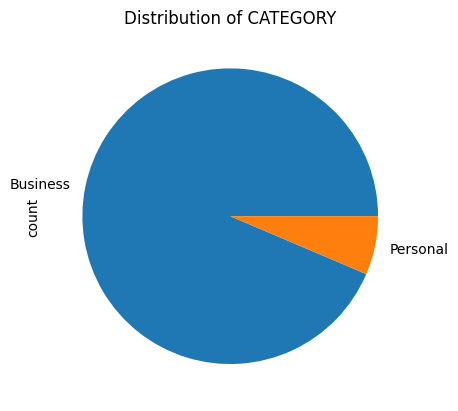

In [53]:
df['CATEGORY'].value_counts().plot(kind='pie')
plt.title('Distribution of CATEGORY')
plt.show()

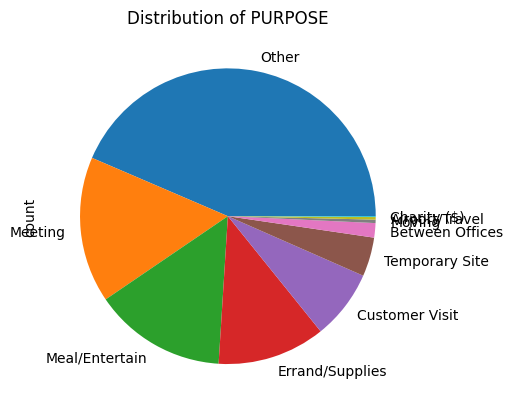

In [54]:
df['PURPOSE'].value_counts().plot(kind='pie')
plt.title('Distribution of PURPOSE')
plt.show()

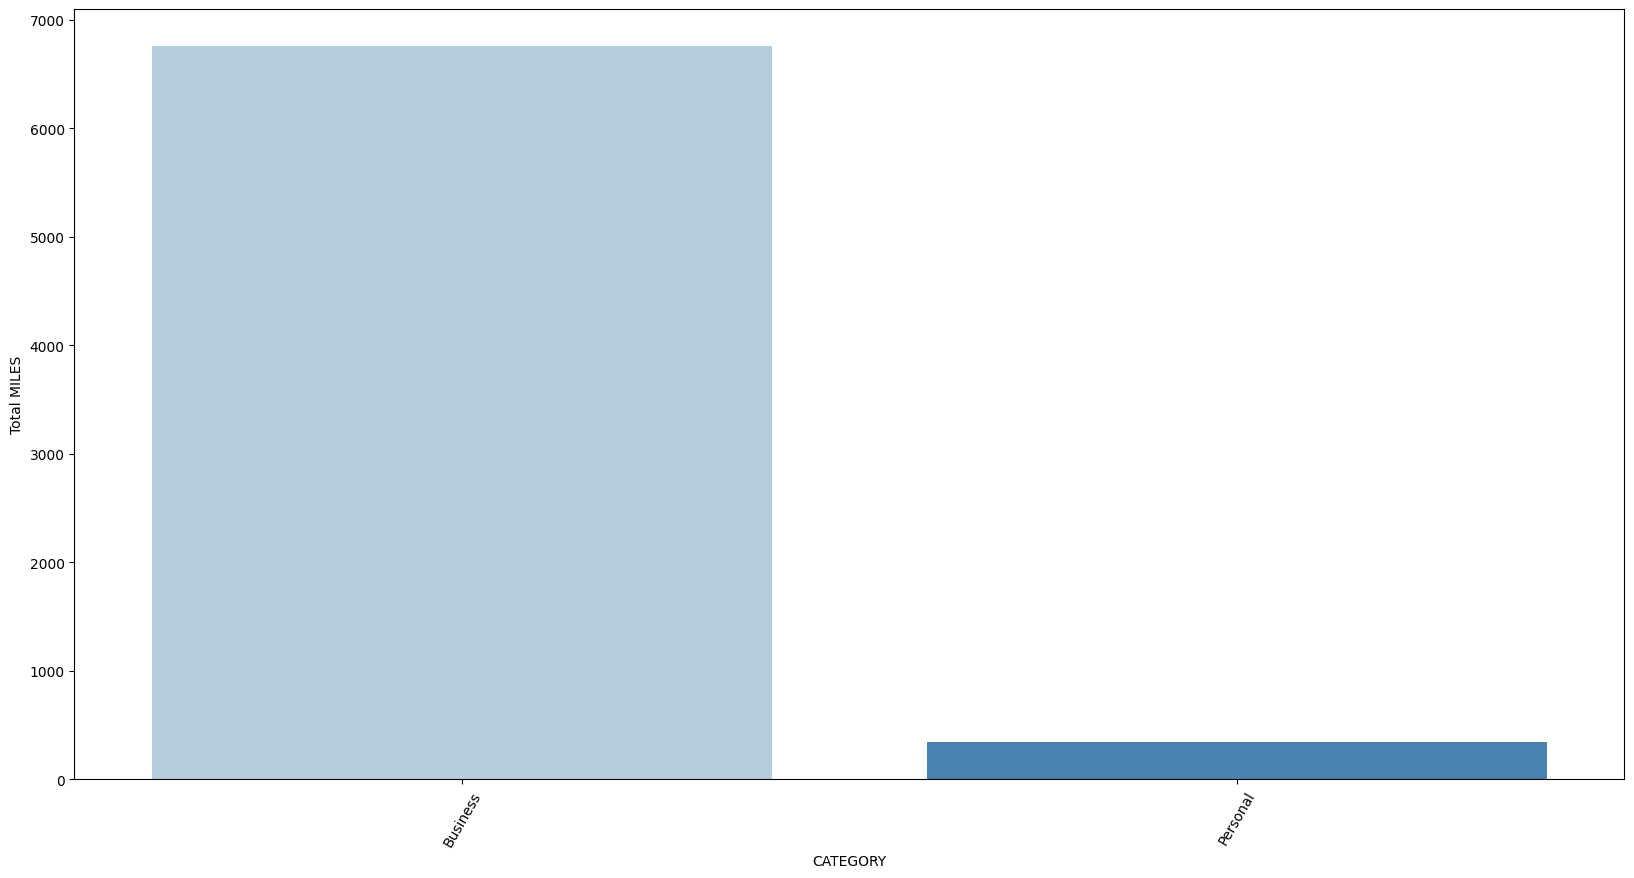

In [55]:
categorical_features = [ 'CATEGORY']
sales = df['MILES']

# Ignore warnings temporarily
warnings.filterwarnings("ignore")

for col in categorical_features:
    plt.figure(figsize=(20, 10))
    sns.barplot(x=col, y=sales, data=df, estimator=sum, ci=None, palette='Blues')
    plt.ylabel("Total MILES")
    plt.xlabel(col)
    plt.xticks(rotation=60)
    plt.show()

# Resetting warnings to default behavior
warnings.filterwarnings("default")

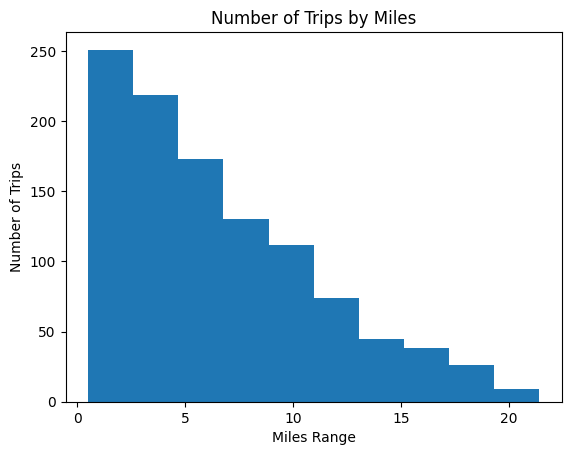

In [56]:
df[ 'MILES' ].plot.hist()

plt.xlabel("Miles Range")
plt.ylabel("Number of Trips")

# setting y_label as price
plt.title("Number of Trips by Miles")
plt.show()

Text(0.5, 1.0, 'Number of trips Vs time')

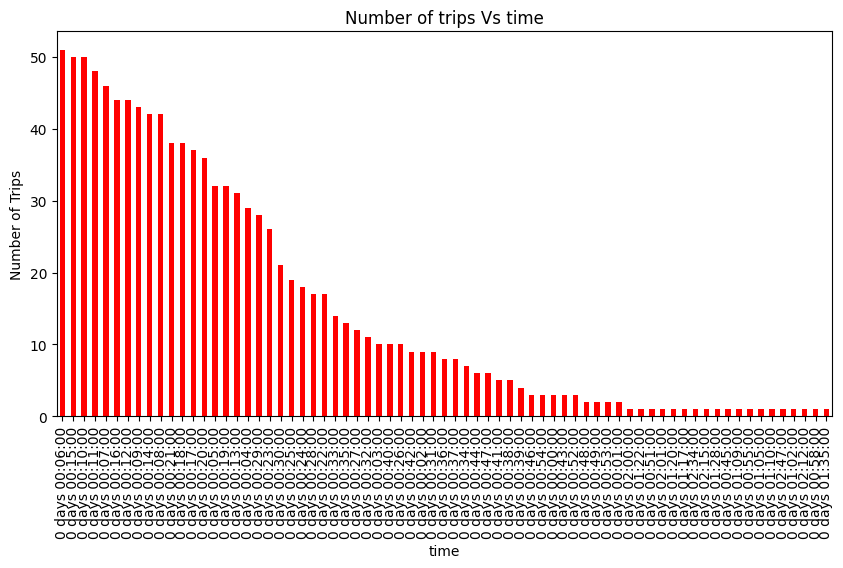

In [57]:

time = df['time'].value_counts()
time.plot(kind= 'bar', color= 'red', figsize= (10,5))
plt.xlabel( 'time' )
plt.ylabel( 'Number of Trips' )
plt.title( 'Number of trips Vs time')

Text(0.5, 1.0, 'Number of Trips by Pickup points')

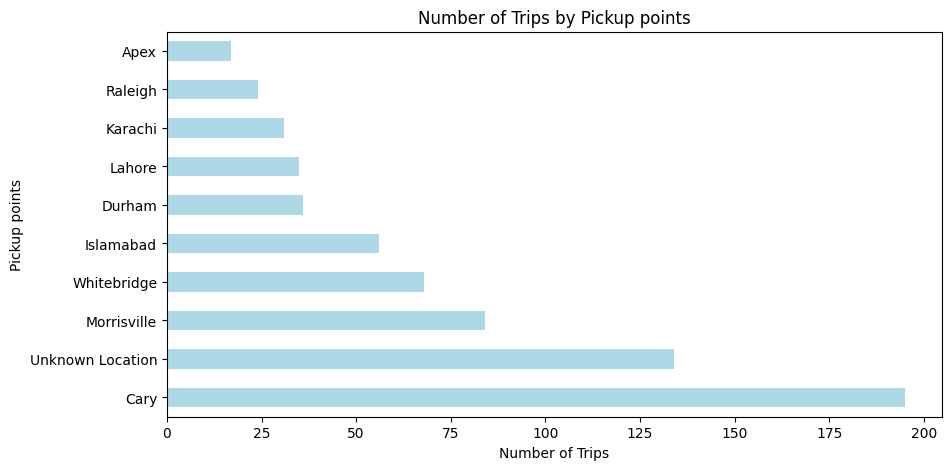

In [58]:
pic_point = df[ 'START' ].value_counts().nlargest(10)
pic_point.plot(kind='barh', color= 'lightblue', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Pickup points' )
plt.title( 'Number of Trips by Pickup points')

Text(0.5, 1.0, 'Number of Trips by END points')

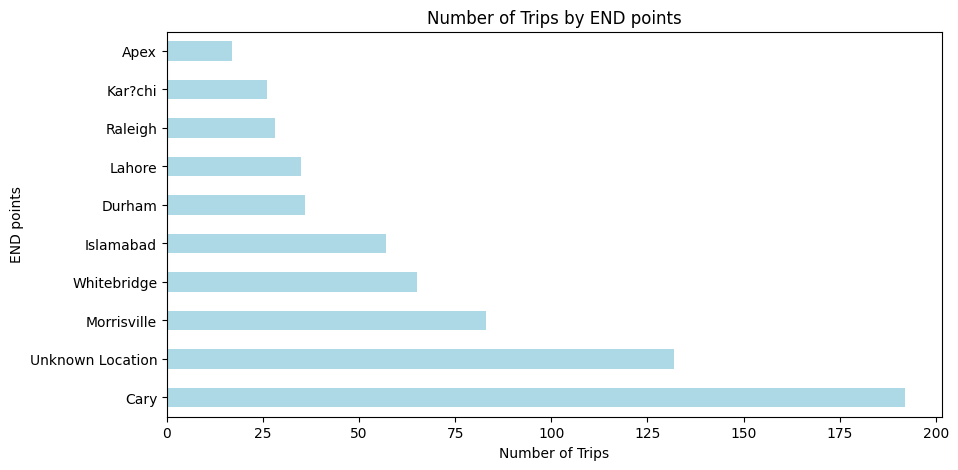

In [59]:
END_point = df[ 'STOP' ].value_counts().nlargest(10)
END_point.plot(kind='barh', color= 'lightblue', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('END points' )
plt.title( 'Number of Trips by END points')

Text(0.5, 1.0, 'points - points Trips Counts')

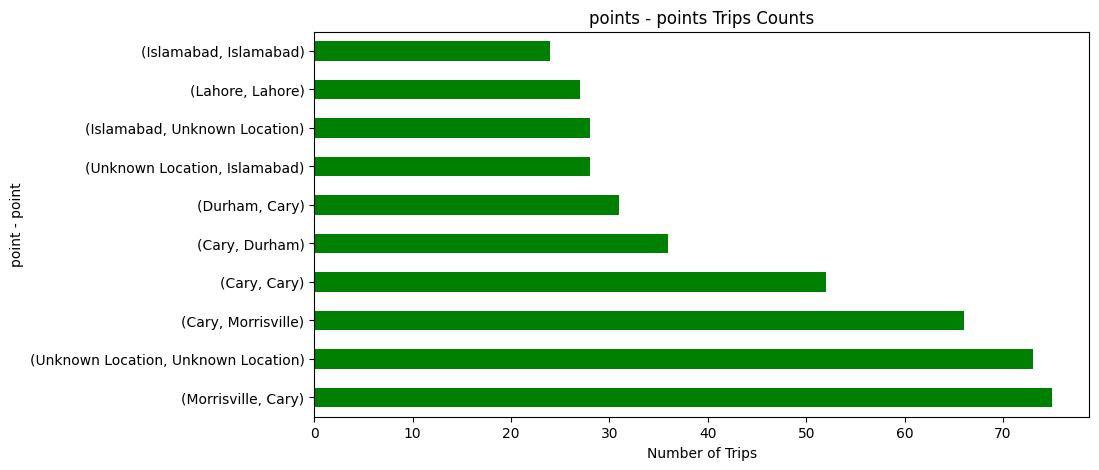

In [60]:
p_p = df[[ 'START', 'STOP'] ].value_counts().nlargest(10)
p_p.plot(kind='barh', color= 'green', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('point - point' )
plt.title( 'points - points Trips Counts')

## Export the dataframe to excel file


In [61]:
## Export the dataframe to excel file
file_name = 'UBER_Cleaned.xlsx'
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\writer\excel.py:292: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  workbook.properties.modified = datetime.datetime.utcnow()


DataFrame is written to Excel File successfully.


In [62]:
def label_encoding(column):
    for column in columns :
        
        # Initialize LabelEncoder
        label_encoder = LabelEncoder()
        # Encode categorical variables
        df[column] = label_encoder.fit_transform(df[column])


columns = ['CATEGORY','START','STOP']
label_encoding(columns)
warnings.filterwarnings("ignore")



C:\Users\Dell\AppData\Local\Temp\ipykernel_18356\590862626.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\Dell\AppData\Local\Temp\ipykernel_18356\590862626.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\Dell\AppData\Local\Temp\ipykernel_18356\590862626.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

# Finding relationships


In [63]:
df=df[columns].corr()

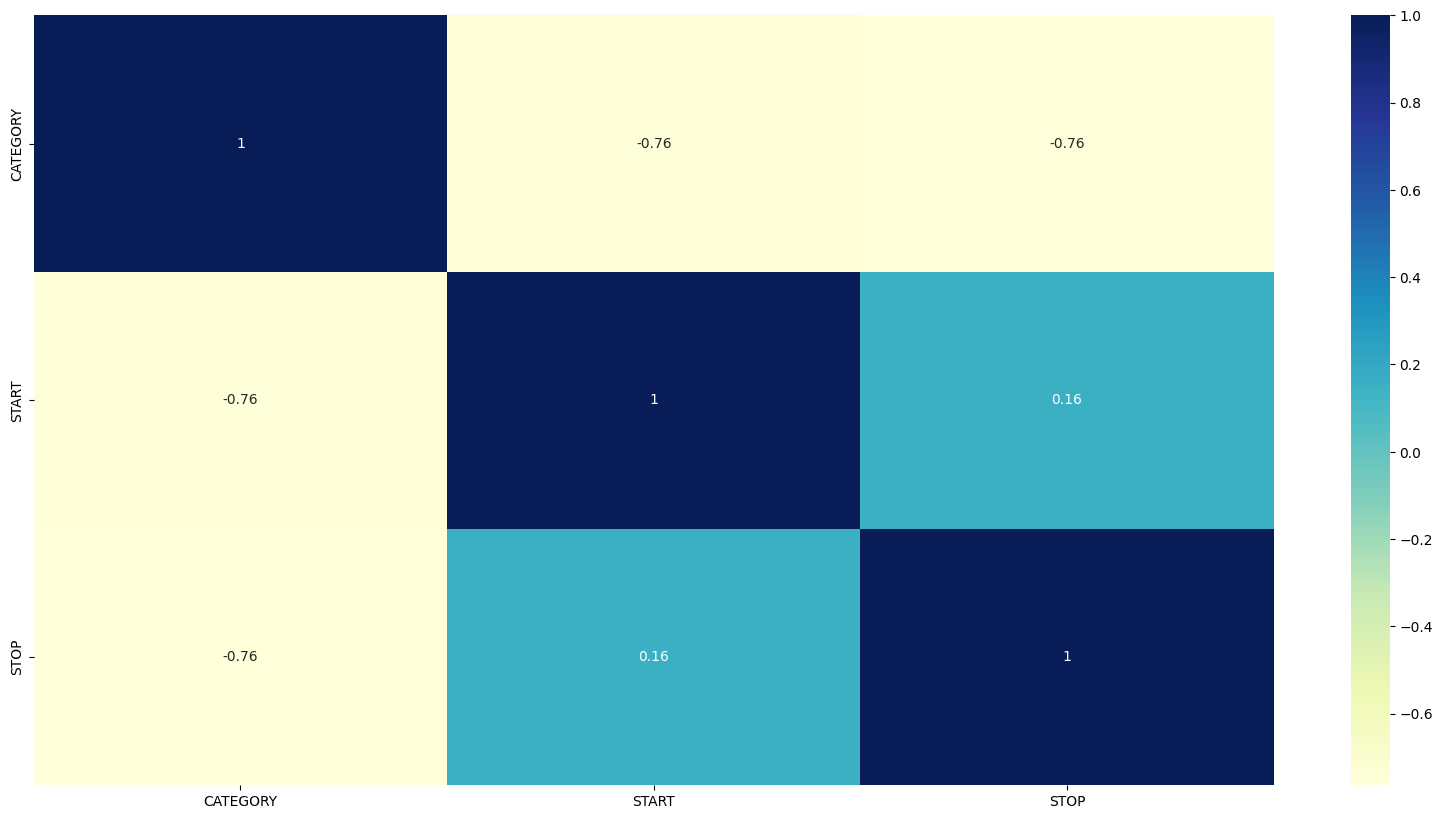

In [64]:
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
# Plot Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

plt.show()

In [65]:
df.skew()

CATEGORY    1.731936
START       0.911941
STOP        0.897474
dtype: float64